In [1]:
from obspy.core import *
from matplotlib import pyplot as plt

from scipy.stats import norm
import numpy as np

In [2]:
sta_file = open('./stidx_MCF_1.txt', 'r')
sta_lines = sta_file.readlines()
sta_file.close()

sta_1 = []
for sta_line in sta_lines:
    stas = sta_line.split()
    sta_1 += stas

sta_file = open('./stidx_MCF_2.txt', 'r')
sta_lines = sta_file.readlines()
sta_file.close()

sta_2 = []
for sta_line in sta_lines:
    stas = sta_line.split()
    sta_2 += stas
    
sta_all = open('../stations_YA.txt', 'r')
sta_lines = sta_all.readlines()
sta_all.close

sta_dict = {}
for sta in sta_lines:
    sta_id, stlo, stla = sta.split()[0:3]
    stlo, stla = float(stlo), float(stla)
    sta_dict[sta_id] = [stlo, stla]

In [4]:
data_path = '/Volumes/Hao/SOSAF_data/067/YA/'

t_b, t, fs = -90, 60, 500
t0 = UTCDateTime('2020-03-07T17:34:41.5Z')

data_z_1 = []
for i in range(len(sta_1)):
    tr = read(data_path+'R'+sta_1[i]+'/*DPZ*')
    tr_z = tr.slice(t0+t_b-t/2,t0+t_b+t/2)
    tr_z = tr_z.filter('bandpass', freqmin=1, freqmax=5, zerophase=True)
    data = tr_z[0].data
    data_z_1.append(data)

amp = []
for i in range(len(data_z_1)):
    amp.append(np.sqrt(np.sum([k**2 for k in data_z_1[i]])))

R = 6371393 #m
dx1, dy1, dt1, cc_all1 = [], [], [], []
for i in range(len(sta_1)):
    for j in range(i+1,len(sta_1)):
        st1, st2 = sta_1[i], sta_1[j]
        lo1, la1 = sta_dict[st1]
        lo2, la2 = sta_dict[st2]
        dx1.append(R*((lo2-lo1)*np.pi/180)*np.cos((la2+la1)*np.pi/360))
        dy1.append(R*(la2-la1)*np.pi/180)
        
        cc = np.correlate(data_z_1[i], data_z_1[j],'full')/ \
            (amp[i]*amp[j])
        cc_all1.append(max(cc))
        dt1.append((t*fs - np.argmax(cc))/fs) #t2 - t1

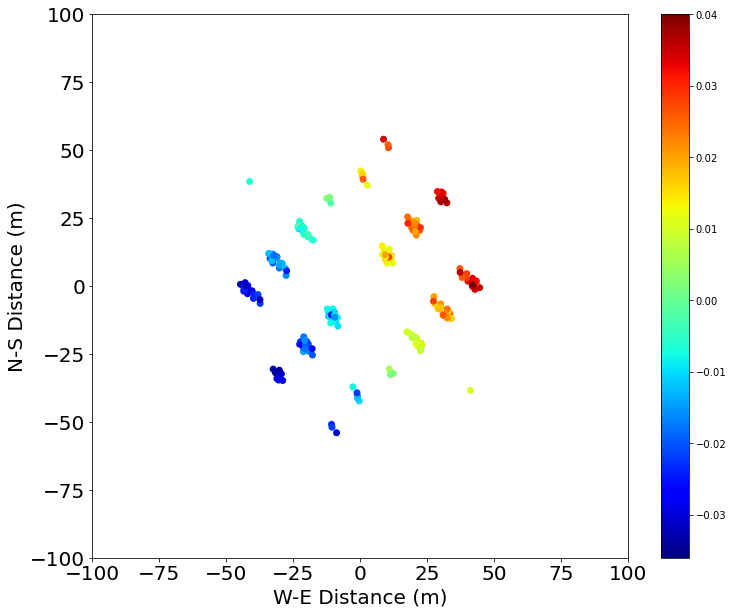

In [7]:
cc_lim = 0.7
dx_cc1, dy_cc1, dt_cc1, cc_cc1 = [], [], [], []
for i in range(len(dx1)):
    if cc_all1[i]>cc_lim and dt1[i]*dx1[i]>0:
        dx_cc1.append(dx1[i])
        dy_cc1.append(dy1[i])
        dt_cc1.append(dt1[i])
        cc_cc1.append(cc_all1[i])

plt.figure(figsize=(12,10))
plt.scatter(dx_cc1, dy_cc1, c=dt_cc1, marker='.', linewidths=4, cmap='jet')
plt.scatter([-i for i in dx_cc1], [-i for i in dy_cc1], c=[-i for i in dt_cc1], \
            marker='.', linewidths=4, cmap='jet')
plt.xticks(size=20)
plt.yticks(size=20)
plt.xlim([-100, 100])
plt.ylim([-100, 100])
plt.xlabel('W-E Distance (m)', fontsize=20)
plt.ylabel('N-S Distance (m)', fontsize=20)

plt.colorbar()

T = np.array(dt_cc1)
T.resize(156,1)
D = np.array([dx_cc1,dy_cc1]).T
S1 = np.dot(np.linalg.pinv(D), T)

In [5]:
data_z_2 = []
for i in range(len(sta_2)):
    tr = read(data_path+'R'+sta_2[i]+'/*DPZ*')
    tr_z = tr.slice(t0+t_b-t/2,t0+t_b+t/2)
    tr_z = tr_z.filter('bandpass', freqmin=1, freqmax=5, zerophase=True)
    data = tr_z[0].data
    data_z_2.append(data)

amp = []
for i in range(len(data_z_2)):
    amp.append(np.sqrt(np.sum([k**2 for k in data_z_2[i]])))

R = 6371393 #m
dx2, dy2, dt2, cc_all2 = [], [], [], []
for i in range(len(sta_2)):
    for j in range(i+1,len(sta_2)):
        st1, st2 = sta_2[i], sta_2[j]
        lo1, la1 = sta_dict[st1]
        lo2, la2 = sta_dict[st2]
        dx2.append(R*((lo2-lo1)*np.pi/180)*np.cos((la2+la1)*np.pi/360))
        dy2.append(R*(la2-la1)*np.pi/180)
        
        cc = np.correlate(data_z_2[i], data_z_2[j],'full')/ \
            (amp[i]*amp[j])
        cc_all2.append(max(cc))
        dt2.append((t*fs - np.argmax(cc))/fs) #t2 - t1

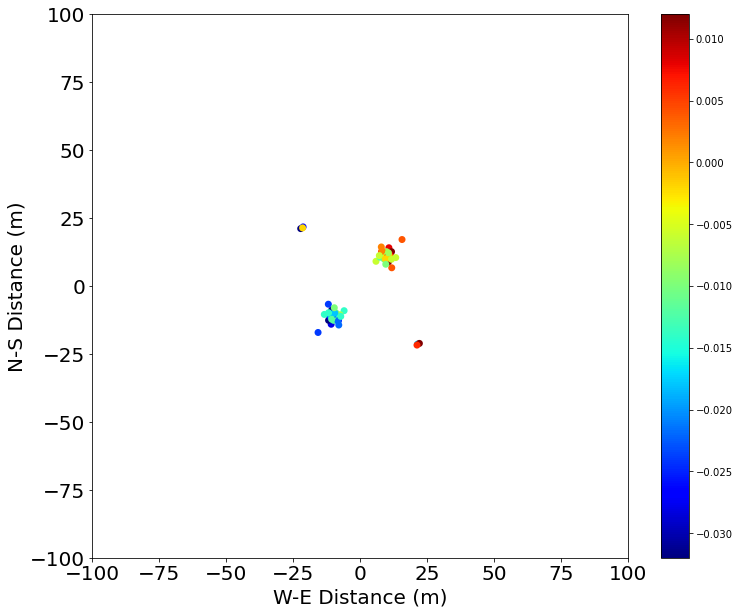

In [9]:
cc_lim = 0.785
# 0.785 for -90s
# 0.75 for -120s
dx_cc2, dy_cc2, dt_cc2, cc_cc2 = [], [], [], []
for i in range(len(dx2)):
    if cc_all2[i]>cc_lim and abs(dt2[i])<0.2 and dt2[i]*dx2[i]>0:
        dx_cc2.append(dx2[i])
        dy_cc2.append(dy2[i])
        dt_cc2.append(dt2[i])
        cc_cc2.append(cc_all2[i])

plt.figure(figsize=(12,10))
plt.scatter(dx_cc2, dy_cc2, c=dt_cc2, marker='.', linewidths=4, cmap='jet')
plt.scatter([-i for i in dx_cc2], [-i for i in dy_cc2], c=[-i for i in dt_cc2], \
           marker='.', linewidths=4, cmap='jet')
plt.xticks(size=20)
plt.yticks(size=20)
plt.xlim([-100, 100])
plt.ylim([-100, 100])
plt.xlabel('W-E Distance (m)', fontsize=20)
plt.ylabel('N-S Distance (m)', fontsize=20)

plt.colorbar()

T = np.array(dt_cc2)
T.resize(42,1)
D = np.array([dx_cc2,dy_cc2]).T
S2 = np.dot(np.linalg.pinv(D), T)

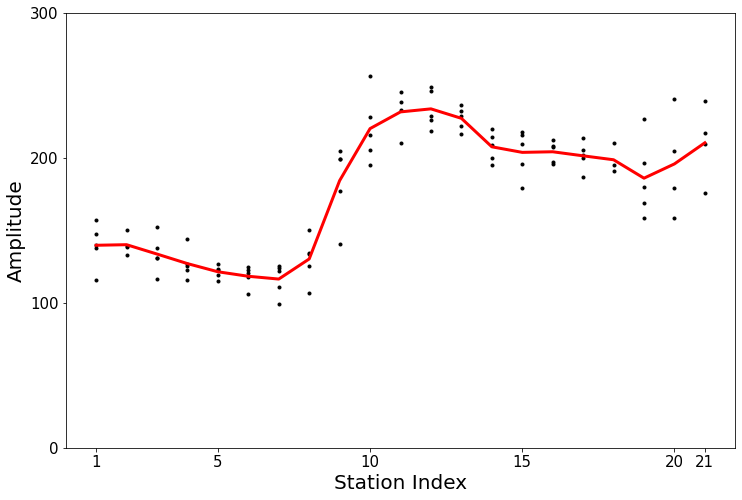

[139.71803583 140.11431272 133.6567296  127.06520752 121.43592754
 118.32643842 116.40516627 130.26862484 184.30991039 220.20600256
 231.71957945 233.81337846 227.29436688 207.64589734 203.80117356
 204.21560583 201.42007653 198.70244893 185.99326954 195.83369691
 210.40653478]


In [11]:
sta_a = {}
for i in range(len(sta_1)):
    amp = np.mean([abs(j) for j in data_z_1[i]])
    sta_a[sta_1[i]] = amp
for i in range(len(sta_2)):
    amp = np.mean([abs(j) for j in data_z_2[i]])
    sta_a[sta_2[i]] = amp
    
plt.figure(figsize=(12,8))
amp = np.zeros(21)
nump = np.zeros(21)
for i in sta_a:
    if i[0]== '1':
        ind = int(i)-1090
        plt.plot(ind+1, sta_a[i], 'k.', markersize=6)
        amp[ind] += sta_a[i]
        nump[ind] += 1
    else:
        ind = int(i[2:4])-1
        plt.plot(ind+1, sta_a[i], 'k.', markersize=6)
        amp[ind] += sta_a[i]
        nump[ind] += 1
        
amp_mean = amp/nump        
plt.plot(np.arange(1,22), amp_mean, 'r', linewidth=3)
plt.xticks([1,5,10,15,20,21], fontsize=15)
plt.yticks([0,100,200,300], fontsize=15)
plt.xlabel('Station Index', fontsize=20)
plt.ylabel('Amplitude', fontsize=20)
plt.show()

print(amp_mean)

In [12]:
v1 = 1/np.sqrt(S1[0]**2+S1[1]**2)
v2 = 1/np.sqrt(S2[0]**2+S2[1]**2)

t1 = 44.5 - np.arctan(S1[1]/S1[0])*180/np.pi
t2 = 44.5 - np.arctan(S2[1]/S2[0])*180/np.pi

v_k = v1/v2
sint_k = np.sin(t1*np.pi/180)/np.sin(t2*np.pi/180)

a_k = 2
rho_k = 1/a_k*(v1*np.cos(t1*np.pi/180))/(v2*np.cos(t2*np.pi/180))

print(v1[0], v2[0])
print(t1[0], t2[0])
print(v_k[0], sint_k[0], rho_k[0])

1315.9273274222755 700.2556642154794
16.82977847140735 8.403313854189541
1.8792098295935304 1.9811743629263185 0.9091212697902292
